# Import Library


In [86]:
# Import library
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf_lib
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

# Load Dataset

In [87]:
chess = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projek Akhir Machine Learning Terapan /datasets/games.csv")

chess.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


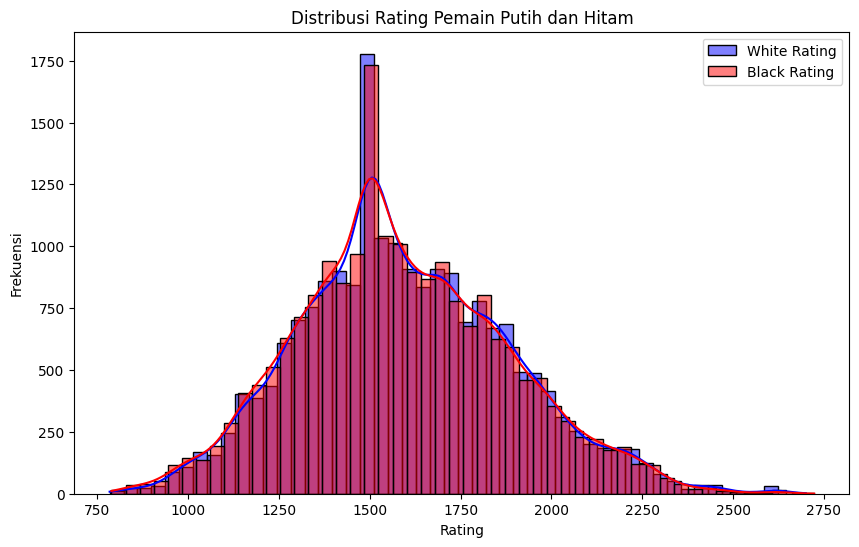

In [88]:
# Visualisasi distribusi rating
plt.figure(figsize=(10, 6))
sns.histplot(chess['white_rating'], bins=50, kde=True, color='blue', label='White Rating')
sns.histplot(chess['black_rating'], bins=50, kde=True, color='red', label='Black Rating')
plt.title('Distribusi Rating Pemain Putih dan Hitam')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

# EDA

In [89]:
chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [90]:
print("Banyaknya permainan: ", len(chess.id.unique()))
print("Banyaknya pemain putih: ", len(chess.white_id.unique()))
print("Banyaknya pemain hitam: ", len(chess.black_id.unique()))
print("Banyaknya opening: ", len(chess.opening_name.unique()))

Banyaknya permainan:  19113
Banyaknya pemain putih:  9438
Banyaknya pemain hitam:  9331
Banyaknya opening:  1477


In [91]:
# Mengecek statistik data
chess.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [92]:
# Mengecek apakah ada missing values
chess.isnull().sum()

,0
id,0
rated,0
created_at,0
last_move_at,0
turns,0
victory_status,0
winner,0
increment_code,0
white_id,0
white_rating,0


In [93]:
# mengecek apakah ada yang duplicate
chess['id'].duplicated().sum()

945

In [94]:
# Menemukan baris yang duplikat berdasarkan kolom 'id'
duplikat = chess[chess.duplicated(subset=['id'])]
print(duplikat)

             id  rated    created_at  last_move_at  turns victory_status  \
950    XRuQPSzH   True  1.503580e+12  1.503580e+12     50         resign   
1794   x1Svcl0P   True  1.499820e+12  1.499830e+12     59           mate   
1830   wgIHzqDo   True  1.499710e+12  1.499710e+12    113           mate   
2554   JrFxlGZo  False  1.489330e+12  1.489330e+12     78           mate   
2556   ezKACesj  False  1.488840e+12  1.488840e+12     51           mate   
...         ...    ...           ...           ...    ...            ...   
20013  Uk0pZCRR   True  1.499532e+12  1.499541e+12     95         resign   
20014  ZhZm1ol9   True  1.498871e+12  1.498879e+12    109           draw   
20015  fpqjttDx   True  1.497663e+12  1.497664e+12     42         resign   
20016  lzPgCJCS   True  1.497660e+12  1.497663e+12    102         resign   
20017  p391pBJv   True  1.497647e+12  1.497654e+12     97         resign   

      winner increment_code         white_id  white_rating         black_id  \
950    b

In [95]:
# Mennghapus data permainan yang sama
chess = chess.drop_duplicates(subset=['id'])
chess.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19113 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19113 non-null  object 
 1   rated           19113 non-null  bool   
 2   created_at      19113 non-null  float64
 3   last_move_at    19113 non-null  float64
 4   turns           19113 non-null  int64  
 5   victory_status  19113 non-null  object 
 6   winner          19113 non-null  object 
 7   increment_code  19113 non-null  object 
 8   white_id        19113 non-null  object 
 9   white_rating    19113 non-null  int64  
 10  black_id        19113 non-null  object 
 11  black_rating    19113 non-null  int64  
 12  moves           19113 non-null  object 
 13  opening_eco     19113 non-null  object 
 14  opening_name    19113 non-null  object 
 15  opening_ply     19113 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.4+ MB


In [96]:
chess = (
    chess.assign(
        opening_archetype=chess.opening_name.map(
            lambda n: n.split(":")[0].split("|")[0].split("#")[0].strip()
        ),
        opening_moves=chess.apply(lambda srs: srs['moves'].split(" ")[:srs['opening_ply']],
                                  axis=1)
    )
)

Melihat peermainan yang dimainkan oleh satu pemain setidaknya minimal 2 kali

4001 pemain yang bermain catur setidaknya dua kali.


15635

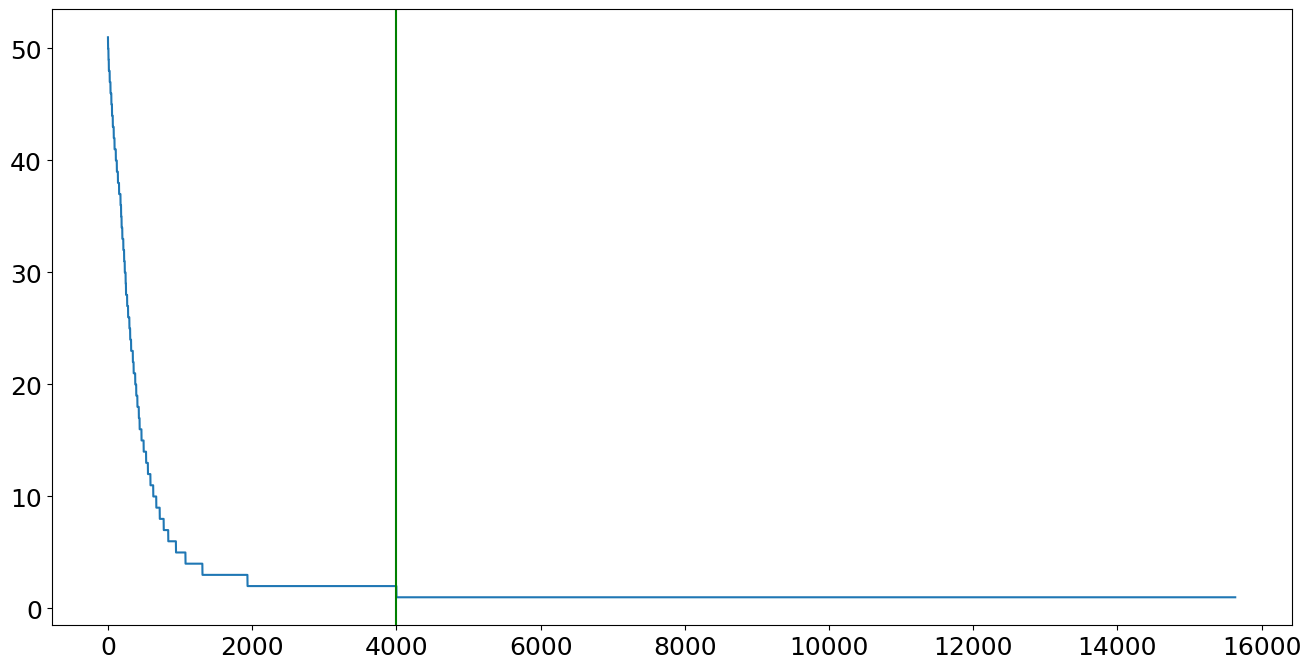

In [97]:
chess_played = pd.concat([chess['white_id'], chess['black_id']]).value_counts()
chess_played.reset_index(drop=True).plot.line(figsize=(16, 8), fontsize=18)

n_ge_2 = len(chess_played[chess_played > 1])
print(str(n_ge_2) + " pemain yang bermain catur setidaknya dua kali.")

import matplotlib.pyplot as plt
plt.axvline(n_ge_2, color='green')

len(chess_played)

In [98]:
chess_played[chess_played > 1].sum()

26592

In [99]:
opening_used = (
    pd.concat([
        chess.groupby('white_id')['opening_archetype'].value_counts(),
        chess.groupby('black_id')['opening_archetype'].value_counts()
    ])
    .rename_axis(index=['player_id', 'opening_archetype'])  # Ganti nama indeks dengan list-like
    .reset_index(name='times_used')  # Reset indeks dan beri nama kolom hasil value_counts
    .groupby(['player_id', 'opening_archetype'])['times_used'].sum()  # Jumlahkan times_used
    .reset_index()  # Reset indeks untuk hasil akhir
)

opening_used.head(10)

,player_id,opening_archetype,times_used
0,--jim--,Scandinavian Defense,1
1,-0olo0-,French Defense,1
2,-l-_jedi_knight_-l-,Guatemala Defense,1
3,-l-_jedi_knight_-l-,Hungarian Opening,3
4,-l-_jedi_knight_-l-,King's Gambit Accepted,1
5,-l-_jedi_knight_-l-,Owen Defense,2
6,-l-_jedi_knight_-l-,Pirc Defense,1
7,-l-_jedi_knight_-l-,Scandinavian Defense,4
8,-mati-,Barnes Defense,1
9,-pavel-,Scandinavian Defense,1


In [100]:
result = (
    opening_used
    .reset_index()  # Reset indeks untuk memudahkan manipulasi
    .groupby('opening_archetype')  # Kelompokkan berdasarkan opening_archetype
    .times_used
    .sum()  # Jumlahkan times_used
    .sort_values(ascending=False)  # Urutkan secara menurun
    .to_frame()  # Ubah menjadi DataFrame
    .pipe(lambda df: df.assign(times_used=df.times_used / df.times_used.sum()))  # Hitung proporsi
    .squeeze()  # Ubah menjadi Series
    .head(10)  # Ambil 10 teratas
)

print(result)

opening_archetype
Sicilian Defense        0.132161
French Defense          0.071313
Queen's Pawn Game       0.061320
Italian Game            0.048449
King's Pawn Game        0.045571
Ruy Lopez               0.042484
English Opening         0.036572
Scandinavian Defense    0.035996
Philidor Defense        0.034008
Caro-Kann Defense       0.029352
Name: times_used, dtype: float64


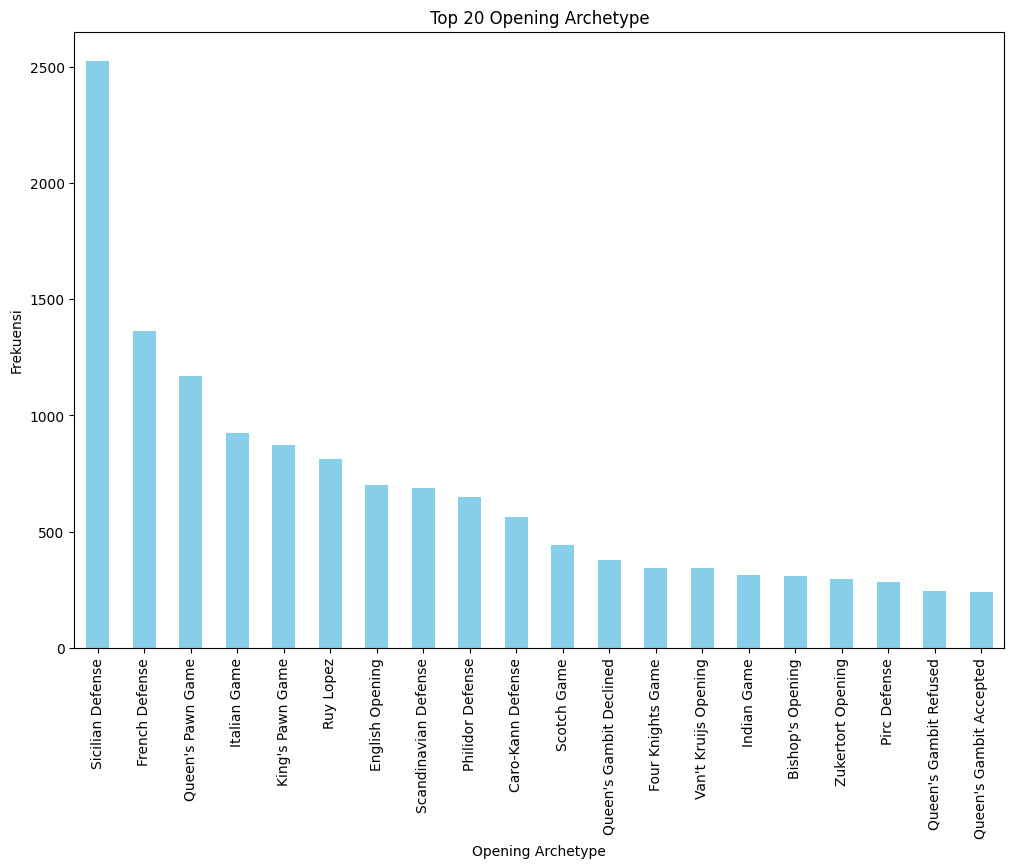

In [101]:
# Visualisasi distribusi opening archetype
plt.figure(figsize=(12, 8))
chess['opening_archetype'].value_counts().head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Opening Archetype')
plt.xlabel('Opening Archetype')
plt.ylabel('Frekuensi')
plt.show()

# Data Preprocessing

## Filter by rating range

In [102]:
chess_rating = (
    ((chess['white_rating'] >= 1500) & (chess['black_rating'] <= 2200)) &
    ((chess['black_rating'] >= 1500) & (chess['white_rating'] <= 2200))
)
chess_data = chess[chess_rating].copy()
chess_data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,opening_archetype,opening_moves
61,ztpC1S2c,True,1.503970e+12,1.503970e+12,49,resign,white,8+12,oldpaths,1567,david1488,1573,d4 g6 Nf3 Bg7 Bf4 d6 e3 Nd7 c3 e5 Bg3 Ne7 Nbd2...,A40,Modern Defense,2,Modern Defense,"[d4, g6]"
62,qc8aH5XL,True,1.503970e+12,1.503970e+12,32,resign,black,8+12,oldpaths,1578,lc777,1605,d4 e6 Bf4 c5 c3 Qb6 b3 cxd4 cxd4 Bb4+ Bd2 Qxd4...,A40,Horwitz Defense,2,Horwitz Defense,"[d4, e6]"
63,6sTz6t7D,True,1.503970e+12,1.503970e+12,25,resign,white,8+12,jordanfury,1939,oldpaths,1581,d4 Nf6 c4 e6 Nf3 c5 d5 exd5 cxd5 c4 Nc3 Bb4 Bg...,E10,Blumenfeld Countergambit #2,6,Blumenfeld Countergambit,"[d4, Nf6, c4, e6, Nf3, c5]"
64,XuyVUkDi,True,1.503970e+12,1.503970e+12,40,mate,black,5+10,porquepepe,1618,oldpaths,1568,e4 e6 Bc4 d5 exd5 exd5 Bb3 Qe7+ Ne2 Nf6 d4 Nc6...,C00,French Defense #2,2,French Defense,"[e4, e6]"
65,D5Oa4vGO,True,1.503960e+12,1.503960e+12,39,resign,white,7+12,gio1212,1755,oldpaths,1574,Nf3 g6 g3 Bg7 Bg2 e6 O-O Ne7 c3 c5 d4 Qb6 dxc5...,A04,Zukertort Opening: Kingside Fianchetto,2,Zukertort Opening,"[Nf3, g6]"


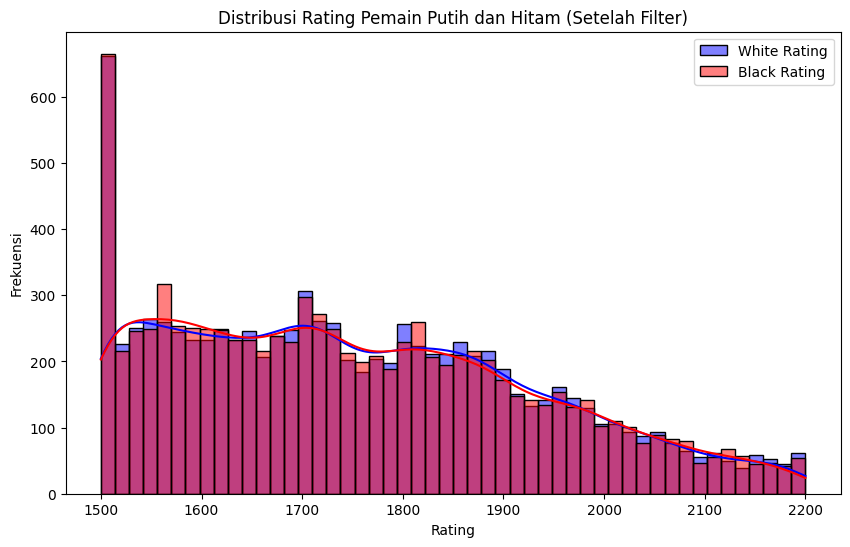

In [103]:
# Visualisasi distribusi rating setelah filter
plt.figure(figsize=(10, 6))
sns.histplot(chess_data['white_rating'], bins=50, kde=True, color='blue', label='White Rating')
sns.histplot(chess_data['black_rating'], bins=50, kde=True, color='red', label='Black Rating')
plt.title('Distribusi Rating Pemain Putih dan Hitam (Setelah Filter)')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

## Feature Selection

In [104]:
# Pilih kolom yang berhubungan untuk rekomendasi
chess = chess[['opening_archetype', 'white_rating', 'black_rating', 'winner', 'increment_code']]

# Model Development with Content Based Filtering

## TF-ID Vectorizer

In [105]:
# Inisialisasi
tf = TfidfVectorizer()

tf.fit(chess['opening_archetype'])

tf.get_feature_names_out()

array(['accelerated', 'accepted', 'alekhine', 'amar', 'amazon',
       'anderssen', 'attack', 'australian', 'barnes', 'benko', 'benoni',
       'bird', 'bishop', 'blackmar', 'blumenfeld', 'bogo', 'bononi',
       'borg', 'budapest', 'canard', 'caro', 'carr', 'catalan', 'center',
       'clemenz', 'colle', 'complex', 'countergambit', 'crab', 'crawly',
       'creepy', 'czech', 'danish', 'declined', 'defense', 'diemer',
       'doery', 'duras', 'dutch', 'east', 'elephant', 'english',
       'englund', 'formation', 'four', 'franco', 'french', 'gambit',
       'game', 'gedult', 'geet', 'george', 'giuoco', 'global',
       'goldsmith', 'grob', 'gruenfeld', 'guatemala', 'gunderam',
       'hippopotamus', 'horwitz', 'hungarian', 'indian', 'irish',
       'italian', 'kadas', 'kangaroo', 'kann', 'king', 'knight',
       'knights', 'kruijs', 'larsen', 'latvian', 'lemming', 'lion',
       'london', 'lopez', 'mexican', 'mieses', 'mikenas', 'modern', 'neo',
       'nimzo', 'nimzowitsch', 'old', 'op

In [106]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(chess['opening_archetype'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(19113, 128)

In [107]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

## Cosine Similarity

In [108]:
# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim, index=chess['opening_archetype'], columns=chess['opening_archetype'])
cosine_sim_df

opening_archetype,Slav Defense,Nimzowitsch Defense,King's Pawn Game,Queen's Pawn Game,Philidor Defense,Sicilian Defense,Blackmar-Diemer Gambit,Nimzowitsch Defense,Italian Game,Scandinavian Defense,...,French Defense,French Defense,English Opening,French Defense,English Defense,Dutch Defense,Queen's Pawn,Queen's Pawn Game,Pirc Defense,Queen's Pawn Game
opening_archetype,,,,,,,,,,,,,,,,,,,,,
Slav Defense,1.000000,0.105441,0.000000,0.000000,0.126748,0.170665,0.0,0.105441,0.000000,0.128169,...,0.147835,0.147835,0.0,0.147835,0.130799,0.095228,0.000000,0.000000,0.108875,0.000000
Nimzowitsch Defense,0.105441,1.000000,0.000000,0.000000,0.119213,0.160519,0.0,1.000000,0.000000,0.120549,...,0.139046,0.139046,0.0,0.139046,0.123023,0.089567,0.000000,0.000000,0.102403,0.000000
King's Pawn Game,0.000000,0.000000,1.000000,0.589453,0.000000,0.000000,0.0,0.000000,0.236209,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.421879,0.589453,0.000000,0.589453
Queen's Pawn Game,0.000000,0.000000,0.589453,1.000000,0.000000,0.000000,0.0,0.000000,0.246795,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.878195,1.000000,0.000000,1.000000
Philidor Defense,0.126748,0.119213,0.000000,0.000000,1.000000,0.192956,0.0,0.119213,0.000000,0.144909,...,0.167144,0.167144,0.0,0.167144,0.147883,0.107666,0.000000,0.000000,0.123096,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dutch Defense,0.095228,0.089567,0.000000,0.000000,0.107666,0.144972,0.0,0.089567,0.000000,0.108873,...,0.125579,0.125579,0.0,0.125579,0.111107,1.000000,0.000000,0.000000,0.092484,0.000000
Queen's Pawn,0.000000,0.000000,0.421879,0.878195,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.878195,0.000000,0.878195
Queen's Pawn Game,0.000000,0.000000,0.589453,1.000000,0.000000,0.000000,0.0,0.000000,0.246795,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.878195,1.000000,0.000000,1.000000


In [109]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=chess['opening_archetype'], columns=chess['opening_archetype'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (19113, 19113)


opening_archetype,Queen's Gambit Declined,Scandinavian Defense,Sicilian Defense,Queen's Pawn Game,Italian Game
opening_archetype,,,,,
English Opening,0.000000,0.000000,0.000000,0.000000,0.000000
King's Pawn Game,0.000000,0.000000,0.000000,0.589453,0.236209
Caro-Kann Defense,0.000000,0.103148,0.137348,0.000000,0.000000
Caro-Kann Defense,0.000000,0.103148,0.137348,0.000000,0.000000
Queen's Gambit Accepted,0.501966,0.000000,0.000000,0.288701,0.000000
Scotch Game,0.000000,0.000000,0.000000,0.217458,0.234589
Mieses Opening,0.000000,0.000000,0.000000,0.000000,0.000000
Italian Game,0.000000,0.000000,0.000000,0.246795,1.000000
Philidor Defense,0.000000,0.144909,0.192956,0.000000,0.000000


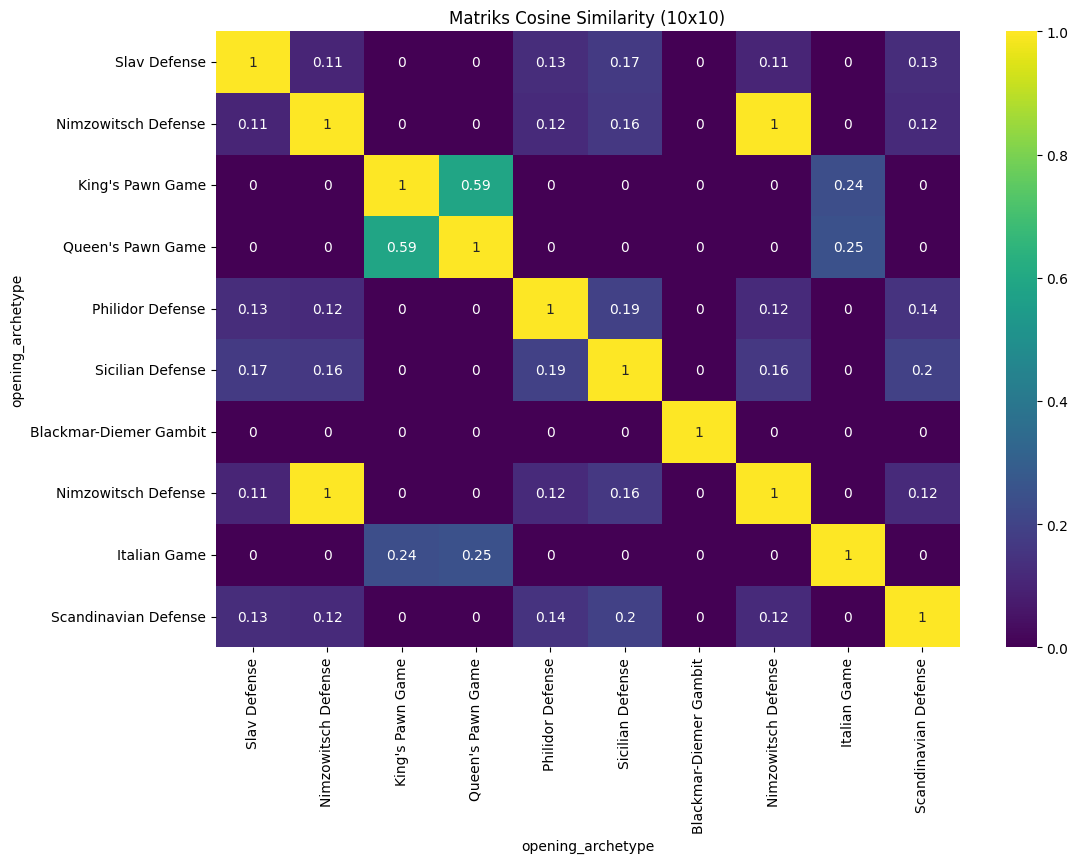

In [110]:
# Visualisasi matriks cosine similarity
plt.figure(figsize=(12, 8))
sns.heatmap(cosine_sim_df.iloc[:10, :10], cmap='viridis', annot=True)
plt.title('Matriks Cosine Similarity (10x10)')
plt.show()

In [111]:
def opening_recommendations(player_id, k=5):
    """
    Improved Recommendation System for Chess Openings

    Parameters:
    -----------
    player_id : str
        ID of the player to get recommendations for
    k : int, optional
        Number of recommendations to generate (default is 5)

    Returns:
    --------
    list of recommended openings
    """
    # Find the player's most used openings
    player_preferences = opening_used[opening_used['player_id'] == player_id]

    if player_preferences.empty:
        print(f"No player data found for '{player_id}'.")
        return []

    # Get the top used openings by the player
    top_player_openings = player_preferences.nlargest(3, 'times_used')['opening_archetype'].tolist()

    # Compute similarity scores for recommended openings
    recommendations = []

    # Iterate through all unique openings
    for opening in chess['opening_archetype'].unique():
        if opening not in top_player_openings:
            # Calculate similarity using cosine similarity matrix
            similarity_scores = []
            for player_opening in top_player_openings:
                if player_opening in cosine_sim_df.index and opening in cosine_sim_df.columns:
                    similarity_scores.append(cosine_sim_df.loc[player_opening, opening])

            # If we have similarity scores, take the average
            if similarity_scores:
                avg_similarity = np.mean(similarity_scores)
                recommendations.append((opening, avg_similarity))

    # Sort recommendations by similarity score
    recommendations.sort(key=lambda x: x[1], reverse=True)

    # Return top k recommendations
    return [rec[0] for rec in recommendations[:k]]

In [112]:
# Example usage
player_id = '--jim--'
print(f"\nRecommended chess openings for user '{player_id}':")
recommended_openings = opening_recommendations(player_id)
for opening in recommended_openings:
    print(opening)


Recommended chess openings for user '--jim--':
Sicilian Defense
French Defense
English Defense
Philidor Defense
Slav Defense


# Model Development with Collaborative Filtering

## Encode User dan Opening

In [113]:
chess_data = opening_used.copy()
chess_data.head()

,player_id,opening_archetype,times_used
0,--jim--,Scandinavian Defense,1
1,-0olo0-,French Defense,1
2,-l-_jedi_knight_-l-,Guatemala Defense,1
3,-l-_jedi_knight_-l-,Hungarian Opening,3
4,-l-_jedi_knight_-l-,King's Gambit Accepted,1


In [114]:
# Encode user_id
user_ids = opening_used['player_id'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

# Encode opening_archetype
opening_ids = opening_used['opening_archetype'].unique().tolist()
opening_to_opening_encoded = {x: i for i, x in enumerate(opening_ids)}
opening_encoded_to_opening = {i: x for i, x in enumerate(opening_ids)}

# Mapping ke dataset
chess_data['user'] = chess_data['player_id'].map(user_to_user_encoded)
chess_data['opening'] = chess_data['opening_archetype'].map(opening_to_opening_encoded)

## Normalisasi Rating

In [115]:
# Normalisasi times_used ke skala 0-1
min_rating = min(chess_data['times_used'])
max_rating = max(chess_data['times_used'])
chess_data['rating'] = chess_data['times_used'].apply(lambda x: (x - min_rating) / (max_rating - min_rating))

## Membagi Data untuk Training dan Validasi

In [116]:
# Acak dataset
chess_data = chess_data.sample(frac=1, random_state=42)

# Membagi data
x = chess_data[['user', 'opening']].values
y = chess_data['rating'].values

train_indices = int(0.8 * len(chess_data))
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

# Tampilkan hasil
print("Data Training:")
print(x_train, y_train)

print("\nData Validasi:")
print(x_val, y_val)

Data Training:
[[10033    11]
 [ 6784     4]
 [ 4906    82]
 ...
 [ 3806    19]
 [15109     1]
 [13733     1]] [0. 0. 0. ... 0. 0. 0.]

Data Validasi:
[[14204     6]
 [13772    56]
 [ 6401   110]
 ...
 [  522    78]
 [ 8636     0]
 [13169    14]] [0. 0. 0. ... 0. 0. 0.]


## Proses Training

In [117]:
class ChessRecommenderNet(tf_lib.keras.Model):
    def __init__(self, num_users, num_openings, embedding_size, **kwargs):
        super(ChessRecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_openings = num_openings
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.opening_embedding = layers.Embedding(
            num_openings,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.opening_bias = layers.Embedding(num_openings, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        opening_vector = self.opening_embedding(inputs[:, 1])
        opening_bias = self.opening_bias(inputs[:, 1])

        dot_user_opening = tf_lib.tensordot(user_vector, opening_vector, 2)
        x = dot_user_opening + user_bias + opening_bias

        return tf_lib.nn.sigmoid(x)

# Inisialisasi model
num_users = len(user_to_user_encoded)
num_openings = len(opening_to_opening_encoded)
model = ChessRecommenderNet(num_users, num_openings, 50)

# Compile model
model.compile(
    loss=tf_lib.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf_lib.keras.metrics.RootMeanSquaredError()]
)

# Training model
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=100,
    validation_data=(x_val, y_val)
)

Epoch 1/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.6214 - root_mean_squared_error: 0.4537 - val_loss: 0.2546 - val_root_mean_squared_error: 0.2137
Epoch 2/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0544 - root_mean_squared_error: 0.0354 - val_loss: 0.2437 - val_root_mean_squared_error: 0.2048
Epoch 3/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0537 - root_mean_squared_error: 0.0363 - val_loss: 0.2471 - val_root_mean_squared_error: 0.2073
Epoch 4/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0544 - root_mean_squared_error: 0.0363 - val_loss: 0.2497 - val_root_mean_squared_error: 0.2092
Epoch 5/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0550 - root_mean_squared_error: 0.0365 - val_loss: 0.2524 - val_root_mean_squared_error: 0.2111
Epoch 6/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0556 - root_mean_squared_error: 0.0392 - val_loss: 0.2559 - val_root_mean_squared_error: 0.2137
Epoch 7/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2

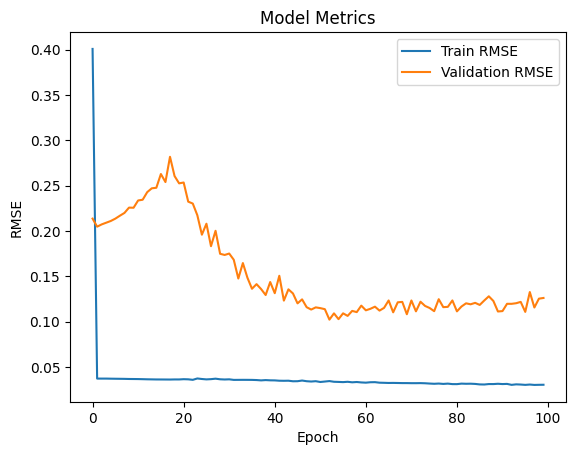

In [118]:
# Plot RMSE
plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('Model Metrics')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [119]:
def get_opening_recommendations(user_id, top_k=5):
    # Daftar opening yang belum pernah digunakan oleh pengguna
    opening_used_by_user = chess_data[chess_data['user'] == user_to_user_encoded[user_id]]['opening']
    opening_not_used = [opening for opening in range(num_openings) if opening not in opening_used_by_user]

    # Buat input untuk model
    user_encoder = user_to_user_encoded[user_id]
    user_opening_array = np.array([[user_encoder, opening] for opening in opening_not_used])

    # Prediksi rating
    ratings = model.predict(user_opening_array).flatten()
    top_ratings_indices = ratings.argsort()[-top_k:][::-1]

    # Mendapatkan rekomendasi
    recommended_opening_ids = [opening_not_used[i] for i in top_ratings_indices]
    recommended_openings = [opening_encoded_to_opening[opening_id] for opening_id in recommended_opening_ids]

    print(f"Rekomendasi opening catur untuk user {user_id}:")
    for opening in recommended_openings:
        print(opening)

# Contoh penggunaan
get_opening_recommendations('--jim--')

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
Rekomendasi opening catur untuk user --jim--:
Australian Defense
Pterodactyl Defense
Sicilian Defense
French Defense
Italian Game
